In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('seaborn')

In [90]:
heart = pd.read_csv("Heart.csv")
heart

,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,1,0
4,5,41,0,0,130,204,0,2,172,0,1.4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0,2,1
299,300,68,1,2,144,193,1,0,141,0,3.4,2,2,2,1
300,301,57,1,2,130,131,0,0,115,1,1.2,2,1,2,1
301,302,57,0,0,130,236,0,2,174,0,0.0,2,1,1,1


In [ ]:
# because our data is somewhat big, it is better to check first if we have any null/missing entries.
heart.isnull().sum()
heart.info()

if we wanted to plot the data as it is right now it would be difficult; because we have many features/attributes that represent our data.
That's why we used PCA

# **PCA**

In [77]:
pca = PCA(n_components= 5)
pca.fit(heart)
print(f'Total number of components used after PCA : {pca.n_components_}')#to print number of components used for pca

Total number of components used after PCA : 5


train shape : (303, 5)


[Text(0.5, 1.0, 'PCA')]

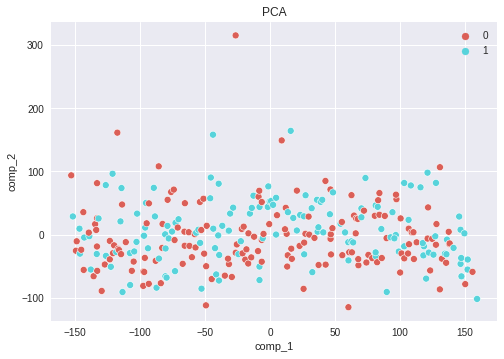

In [79]:
heart_transformed = pca.transform(heart)
print(f'train shape : {heart_transformed.shape}')
df = pd.DataFrame()
df['label'] = heart['AHD']
df['comp_1'] = heart_transformed[:, 0]
df['comp_2'] = heart_transformed[:, 1]
sns.scatterplot(x="comp_1",y="comp_2",hue=df.label.tolist(),
                palette=sns.color_palette("hls",2),
                data=df).set(title=" PCA ") # we visualize data by scatter plot 


In [92]:
print("The initial dimensions of our data" , heart.shape, "\n")
print("The dimension of our data after PCA", heart_transformed.shape)
# we can see that after performing PCA on our data, the dimensionality of our data was reduced

The initial dimensions of our data (303, 15) 

The dimension of our data after PCA (303, 5)


# **t-SNE:**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.002s...
[t-SNE] Computed neighbors for 303 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 18.032555
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.233322
[t-SNE] KL divergence after 1000 iterations: 0.622114


[Text(0.5, 1.0, 't-SNE on Heart Data')]

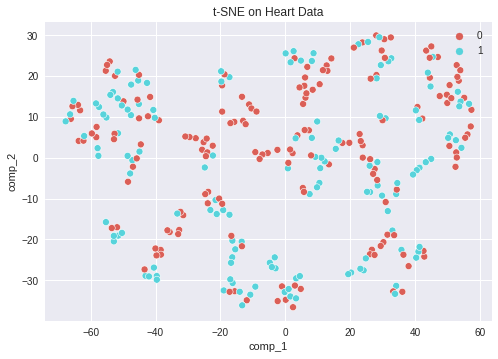

In [96]:
t_SNE = TSNE(n_components=2, verbose=1, random_state= 123, perplexity= 7)
# the perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms

transform = t_SNE.fit_transform(heart)
df = pd.DataFrame()
df['label'] = heart['AHD']
df['comp_1'] = transform[:, 0]
df['comp_2'] = transform[:, 1]
sns.scatterplot(x="comp_1",y="comp_2",hue=df.label.tolist(),
                palette=sns.color_palette("hls",2),
                data=df).set(title="t-SNE on Heart Data") # we visualize data by scatter plot 


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.001s...
[t-SNE] Computed neighbors for 303 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 18.033992
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.348984
[t-SNE] KL divergence after 1000 iterations: 0.635270


[Text(0.5, 1.0, ' t-SNE on heart data after PCA')]

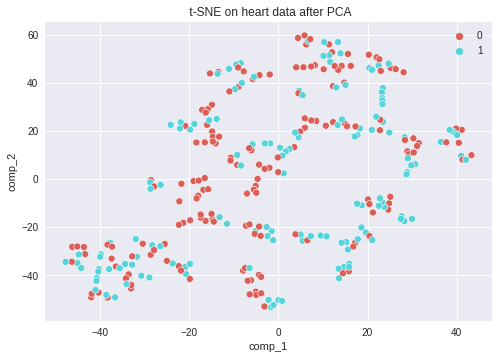

In [97]:
t_SNE_PCA = TSNE(n_components=2, verbose=1, random_state=123, perplexity=7)

t_SNE_transformed = t_SNE_PCA.fit_transform(heart_transformed)
df = pd.DataFrame()
df['label'] = heart['AHD']
df['comp_1'] = t_SNE_transformed[:, 0]
df['comp_2'] = t_SNE_transformed[:, 1]
sns.scatterplot(x="comp_1",y="comp_2",hue=df.label.tolist(),
                palette=sns.color_palette("hls",2),
                data=df).set(title=" t-SNE on heart data after PCA") # we visualize data by scatter plot 


t-SNE and PCA are both dimesionality reduction algorithms, the difference between them is that PCA can maintain great information form the original data as it can take n-components as great the number of features of data.
While t-SNE preserves only local similarities, taking max n-componenets of 3.

# **Kmeans:**

Kmeans on original heart data:

[Text(0.5, 1.0, ' Kmeans on heart data')]

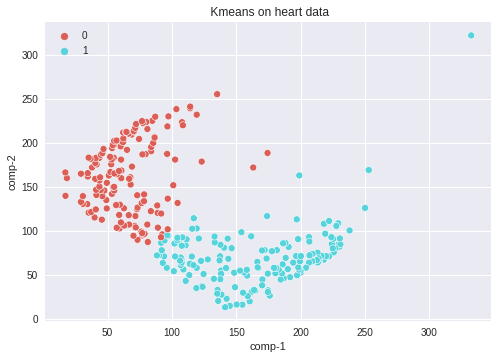

In [95]:
kmeans_heart= KMeans(2, random_state=0) # here we specified the number of cluster we want = 2, refering to having heart disease or not
heart_data= kmeans_heart.fit_transform(heart)
labels_data=kmeans_heart.labels_

df = pd.DataFrame()
df["y"] = labels_data
df["comp-1"] = heart_data[:,0]
df["comp-2"] = heart_data[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=labels_data,
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" Kmeans on heart data")

Kmeans on heart data after PCA:

[Text(0.5, 1.0, ' Kmeans on heart data')]

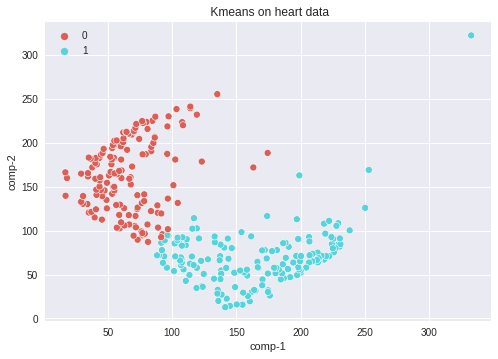

In [82]:
pca_heart= KMeans(2, random_state=0)
heart_data= pca_heart.fit_transform(heart_transformed)
labels_data=pca_heart.labels_

df = pd.DataFrame()
df["y"] = labels_data
df["comp-1"] = heart_data[:,0]
df["comp-2"] = heart_data[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=labels_data,
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" Kmeans on heart data")

Kmeans on heart data after t-SNE:

[Text(0.5, 1.0, ' Kmeans on heart data')]

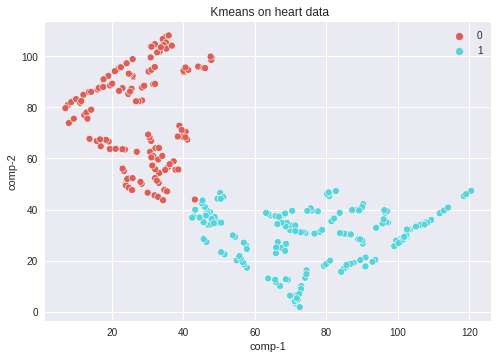

In [83]:
t_SNE_heart= KMeans(2, random_state=0)
heart_data= t_SNE_heart.fit_transform(transform)
labels_data=t_SNE_heart.labels_

df = pd.DataFrame()
df["y"] = labels_data
df["comp-1"] = heart_data[:,0]
df["comp-2"] = heart_data[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=labels_data,
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" Kmeans on heart data")

Kmeans on heart data after t-SNE and PCA:

[Text(0.5, 1.0, ' Kmeans on heart data')]

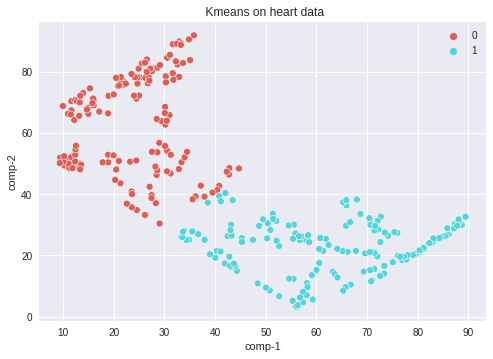

In [85]:
t_SNE_pca_heart= KMeans(2, random_state=0)
heart_data= t_SNE_pca_heart.fit_transform(t_SNE_transformed)
labels_data=t_SNE_pca_heart.labels_

df = pd.DataFrame()
df["y"] = labels_data
df["comp-1"] = heart_data[:,0]
df["comp-2"] = heart_data[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=labels_data,
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" Kmeans on heart data")